# Module 4 - Classification Part I

## Notes
- 1 December 2021: Ran successfully most cases.

In [159]:
import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus 

from sklearn import tree
from scipy import stats
from IPython.display import Image

Gini coefficient @ $v_{i}$:

Gini coefficient $\in [0,1]$

$G(v_{i}) = 1 - \displaystyle \sum_{j=1}^k p_{j}^{2}$

$Overall G = \displaystyle \sum_{i=1}^r \displaystyle \frac{n_{i}G(v_{i})}{n}$

Entropy coefficent $\in [0, log_{2}k]$

$E(v_{i}) = - \displaystyle \sum_{j=1}^k p_{j}log_{2}(p_{j})$

$Overall E = \displaystyle \sum_{i=1}^r \displaystyle \frac{n_{i}E(v_{i})}{n}$

Reference: Shannon Entropy

$H(X) = - \displaystyle \sum_{i=1}^n P(x_{i})log_{2}P(x_{i})$

- Both Gini & Entropy have strongest discriminant power when they approach zero (0).

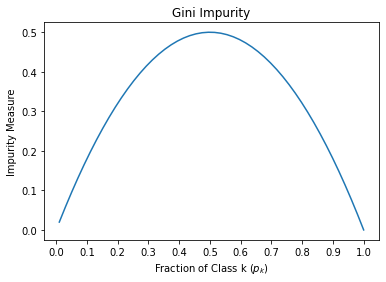

In [160]:
#A figure is created to show Gini ımpurity measures 
def plot_gini(x):
    plt.figure()
    # x = np.linspace(0.01,1)
    y = 1 - (x*x) - (1-x)*(1-x) 
    plt.plot(x,y)
    plt.title('Gini Impurity')
    plt.xlabel("Fraction of Class k ($p_k$)")
    plt.ylabel("Impurity Measure")
    plt.xticks(np.arange(0,1.1,0.1))

    plt.show()

plot_gini(np.linspace(0.01,1))    

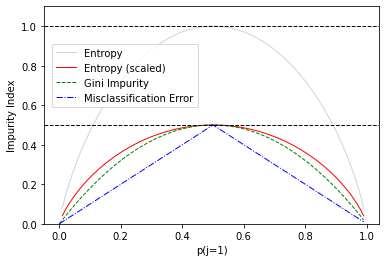

In [161]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

# Excersise code begins ...

In [162]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    gini = 1
    
    if len(value_counts) == n:
        return 0
    
    for key in value_counts.keys():
        pj = value_counts[key]/n
        gini -= (pj)**2    
        
    return gini

def entropy(value_counts):
    entropy = 0
    for key in value_counts.keys():
        pj = value_counts[key]/n
        entropy += pj*math.log(pj,2)
    return -entropy

In [163]:
def get_gini_by_classes(dfs, feat_name, feat_unique_values, n):
    props = {}
    counts = {}
    for value in feat_unique_values:
        counts [value] = 0
        for key in dfs:
            df = dfs[key]
            if value not in props:
                props[value] = []
            props[value].append(len(df[df[feat_name] == value]))
            counts[value] += len(df[df[feat_name] == value])
            
    ginis = {}
    overall_g = 0
    for key in props:
        g = 1
        for val in props[key]:
            pj = val/sum(props[key])
            g -= pj**2
        ginis[key] = g
        ni = counts[key]
        overall_g += g*ni/n
    return ginis, overall_g

import math

def get_entropy(df, label_name):
    
    label_values = df[label_name].unique()
    counts = {}
    n = len(df)
    
    for val in label_values:
        counts[val] = len(df[df[label_name] == val])
#     print(label_values)
#     print(counts)
    
    e = 0
    for key in counts:
        val = counts[key]
        pj = val/n
        e -= pj*math.log(pj,2)
#     print(round(e,4))
    
    return e, counts

# information gain
def get_ig(df, label_name, feat_name):
    e, counts = get_entropy(df, label_name)
    feat_unique_values = df[feat_name].unique()    
    
    counts = {}
    n = len(df)
    
    for val in feat_values:
        counts[val] = len(df[df[feat_name] == val])
    
    dfs = {}
    for cls in classes:
        dfs[cls] = df[df[label_name] == cls]
    feat_props = {}
    feat_counts = {}
    for value in feat_unique_values:
        feat_counts [value] = 0
        for key in dfs:
            df = dfs[key]
            if value not in feat_props:
                feat_props[value] = []
            feat_props[value].append(len(df[df[feat_name] == value]))
            feat_counts[value] += len(df[df[feat_name] == value])
    
    print('feat_unique_values', feat_unique_values)
    print('feat_counts', feat_counts)
    e_split = 0
    for key in feat_counts:
        pi = feat_counts[key]/n
        ei = 0
        for count in feat_props[key]:                
            pj = count/sum(feat_props[key])
            if pj > 0:
                ei -= pj*math.log(pj,2)
            
        e_split += pi*ei
        print(f'{feat_counts[key]}: {e_split}')
    
    return e_split, e - e_split



In [224]:
EX_3_2     = '../data/ex-3_2.csv'
EX_3_3     = '../data/ex-3_3.csv'
EX_3_6     = '../data/ex-3_6.csv'
EX_3_EXTRA = '../data/ex-3_extra.csv'
VERTEBRATE = '../data/vertebrate.csv'

filename = EX_3_2
label_name = 'Class'
dropped_features = ['CustomerID']

filename = EX_3_3
label_name = 'Target_Class'
dropped_features = ['Instance']

# *** This is a more complex case where you have 2 labels/dependent variables. ***
# *** Don't run decision tree on it as of yet ***
filename = EX_3_6
label_name = 'C1'
dropped_features = []

filename = EX_3_EXTRA
label_name = 'default'
dropped_features = []

filename = VERTEBRATE
label_name = 'Class'
dropped_features = ['Name']

df = pd.read_csv(filename)

df.style

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


## *** Data Mapping for some data sets ***
### Begins

In [225]:
if filename == EX_3_2:
    gender = {'M': 1, 'F': 2}
    car_type = {'Family': 1, 'Sports': 2, 'Luxury': 3}
    shirt_size = {'Small': 1, 'Medium':2, 'Large': 3, 'Extra Large': 4} # Preserving the order: Small, Medium, Large, Extra Lage ...
    df = df.replace({'Gender': gender}).replace({'Car Type': car_type}).replace({'Shirt Size': shirt_size})
elif filename == EX_3_3:
    a1 = {'F': 0, 'T': 1}
    a2 = {'F': 0, 'T': 1}
    df = df.replace({'a1': a1}).replace({'a2': a2})
elif filename == EX_3_EXTRA:
    age = {'youth': 1, 'middle_age': 2, 'senior': 3}
    income = {'low': 1, 'medium': 2, 'high': 3}
    student = {'no': 0, 'yes': 1}
    credit_rate = {'fair': 1, 'excellent': 2}
    df = df.replace({'age': age}).replace({'income': income}).replace({'student': student}).replace({'credit_rate':credit_rate})
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


## *** Data Mapping***
### Ends

## *** FOR vertebrate.csv ONLY ***
### Begins

In [226]:
## For data set `vertebrate.csv`, we are binarization the columns as follows:
if filename == VERTEBRATE:
    df_old = df.copy(deep=True)
    df[label_name] = df[label_name].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
    df

In [227]:
if filename == VERTEBRATE:
    pd.crosstab([df['Warm-blooded'],df['Gives Birth']],df[label_name])

## *** FOR vertebrate.csv ONLY ***
### Ends

## Compute Gini Index, Entropy & Information Gain (IG)

In [228]:
## Splitting data set into multiple data sets by values of the `label`.

classes = df[label_name].unique()
feat_list = df.columns.to_list()
feat_list.remove(label_name)

n = len(df)
dfs_by_classes = {}
for cls in classes:
    dfs_by_classes[cls] = df[df[label_name] == cls]

df_gini_output = pd.DataFrame()
dfs = []
for feat_name in feat_list:
    print(f'\n***{feat_name}***\n')
    feat_values = df[feat_name].unique()
    ginis, overall_g = get_gini_by_classes(dfs_by_classes, feat_name, feat_values, n)
    print('ginis:', ginis)
    print('overall G:', overall_g)
    dfs.append(pd.DataFrame([feat_name, ginis, overall_g]).transpose())    

df_gini_output = pd.concat(dfs)
df_gini_output.columns = ['Feature', 'G(vi)', 'G(S)']
display(df_gini_output)


***Name***

ginis: {'human': 0.0, 'python': 0.0, 'salmon': 0.0, 'whale': 0.0, 'frog': 0.0, 'komodo': 0.0, 'bat': 0.0, 'pigeon': 0.0, 'cat': 0.0, 'leopard shark': 0.0, 'turtle': 0.0, 'penguin': 0.0, 'porcupine': 0.0, 'eel': 0.0, 'salamander': 0.0}
overall G: 0.0

***Warm-blooded***

ginis: {1: 0.40816326530612246, 0: 0.0}
overall G: 0.1904761904761905

***Gives Birth***

ginis: {1: 0.2777777777777777, 0: 0.0}
overall G: 0.11111111111111108

***Aquatic Creature***

ginis: {0: 0.48979591836734704, 1: 0.21875}
overall G: 0.3452380952380953

***Aerial Creature***

ginis: {0: 0.4260355029585799, 1: 0.5}
overall G: 0.43589743589743585

***Has Legs***

ginis: {1: 0.48, 0: 0.31999999999999984}
overall G: 0.42666666666666664

***Hibernates***

ginis: {0: 0.4200000000000001, 1: 0.48}
overall G: 0.44000000000000006


,Feature,G(vi),G(S)
0,Name,"{'human': 0.0, 'python': 0.0, 'salmon': 0.0, '...",0.0
0,Warm-blooded,"{1: 0.40816326530612246, 0: 0.0}",0.190476
0,Gives Birth,"{1: 0.2777777777777777, 0: 0.0}",0.111111
0,Aquatic Creature,"{0: 0.48979591836734704, 1: 0.21875}",0.345238
0,Aerial Creature,"{0: 0.4260355029585799, 1: 0.5}",0.435897
0,Has Legs,"{1: 0.48, 0: 0.31999999999999984}",0.426667
0,Hibernates,"{0: 0.4200000000000001, 1: 0.48}",0.44


In [229]:
e, counts = get_entropy(df, label_name)
print(f'E(S) = {round(e,4)}')
print('counts:', counts)


E(S) = 0.9183
counts: {'mammals': 5, 'non-mammals': 10}


In [230]:
for feat_name in df_gini_output['Feature']:
    print (f'\n---> IG for {feat_name}')
    e_split, ig = get_ig(df, label_name, feat_name)
    print(f'{feat_name}: e_split = {round(e_split,4)} & ig = {round(ig,4)}')
    



---> IG for Name
feat_unique_values ['human' 'python' 'salmon' 'whale' 'frog' 'komodo' 'bat' 'pigeon' 'cat'
 'leopard shark' 'turtle' 'penguin' 'porcupine' 'eel' 'salamander']
feat_counts {'human': 1, 'python': 1, 'salmon': 1, 'whale': 1, 'frog': 1, 'komodo': 1, 'bat': 1, 'pigeon': 1, 'cat': 1, 'leopard shark': 1, 'turtle': 1, 'penguin': 1, 'porcupine': 1, 'eel': 1, 'salamander': 1}
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
Name: e_split = 0.0 & ig = 0.9183

---> IG for Warm-blooded
feat_unique_values [1 0]
feat_counts {1: 7, 0: 8}
7: 0.4027895986644278
8: 0.4027895986644278
Warm-blooded: e_split = 0.4028 & ig = 0.5155

---> IG for Gives Birth
feat_unique_values [1 0]
feat_counts {1: 6, 0: 9}
6: 0.26000896865934164
9: 0.26000896865934164
Gives Birth: e_split = 0.26 & ig = 0.6583

---> IG for Aquatic Creature
feat_unique_values [0 1]
feat_counts {0: 7, 1: 8}
7: 0.4597731301493174
8: 0.7496741665224356
Aquatic Creature: e_sp

# Decision Trees ***
## Gini Coefficient

In [231]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)
    
depth = 3
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)

In [232]:
class_names = df[label_name].unique()
class_names

array(['mammals', 'non-mammals'], dtype=object)

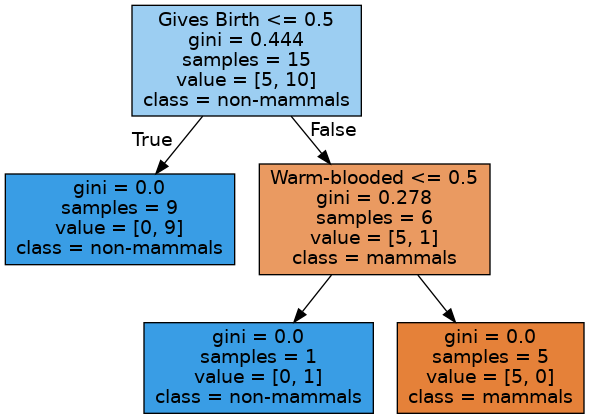

In [233]:
class_names = df[label_name].unique()
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

# Decision Tree *** for vertebrate.csv data set ***
## Gini Coefficient

In [234]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)

depth = 5
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)
# display(X)
# display(Y)

## Graph the Tree


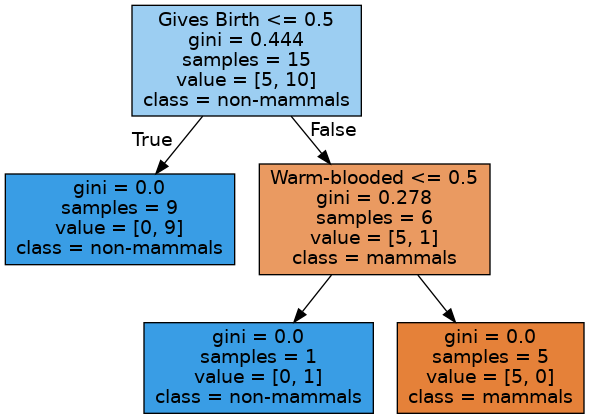

In [235]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Entropy

In [236]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)

depth = 5
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)

## Graph the tree

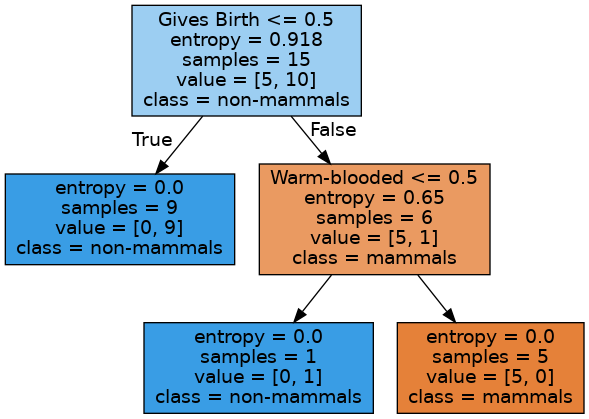

In [237]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Testing the classifier


In [238]:
test_data = []
if filename == VERTEBRATE:    
    test_data = [['gila monster',0,0,0,0,1,1,'non-mammals'],
               ['platypus',1,0,0,0,1,1,'mammals'],
               ['owl',1,0,0,1,1,0,'non-mammals'],
               ['dolphin',1,1,1,0,0,0,'mammals']]
    df_test_data = pd.DataFrame(test_data, columns=df.columns)
    df_test_data

## Making Prediction on test data.

In [239]:
if test_data:
    testY = df_test_data[label_name]
    testX = df_test_data.drop(dropped_features + [label_name], axis=1)
    predY = clf.predict(testX)
    predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
    predictions

In [240]:
from sklearn.metrics import accuracy_score

if test_data:
    print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75
